In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [7]:
print(digits.data)
print(digits.target)
print(digits.images[2])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [9]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

In [11]:
# estimator
clf.fit(digits.data[:-1], digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

In [15]:
import numpy as np
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [23]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [24]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [66]:
iris_data = datasets.load_iris()['data']
df = pd.DataFrame(iris_data)
print("Shape:",df.shape)
print("Type:\n",type(df))
print("First three rows:\n",df[0:3])

Shape: (150, 4)
Type:
 <class 'pandas.core.frame.DataFrame'>
First three rows:
      0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2


In [74]:
df.keys()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [77]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
iris_labels = datasets.load_iris()['target']
df = pd.DataFrame(datasets.load_iris()['data'])

In [124]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes['data'])
labels = diabetes['target']

In [125]:
diabetes_X_train = df[:-20]
diabetes_X_test = df[-20:]
diabetes_y_train = labels[:-20]
diabetes_y_test = labels[-20:]

In [131]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690574

In [8]:
import matplotlib.pyplot as plt

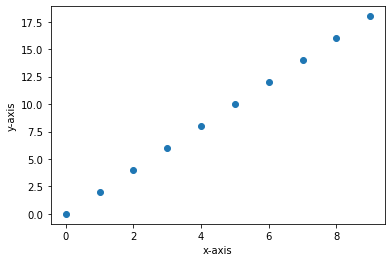

In [13]:
x = [i for i in range(10)]
y = [2*i for i in range(10)]
plt.xlabel('x-axis')
plt.ylabel('y-axis')
# plt.plot(x,y)
plt.scatter(x,y)

In [19]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [54]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('car.data')
X = data[['buying','maint','safety']].values
y = data[['class']]
#convert data from strings to numbers
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])

#y
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
y['class'] = y['class'].map(label_mapping)
y = np.array(y)

# create model

knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("predictions: ", predictions)
print("accuracy: ", accuracy)
print('actual value: ', y[20])
print('predicted value: ', knn.predict(X)[20])

predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 3 2 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 3 1 0 0 0 0 0 1 1 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 0 0
 0 0 3 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 2 3 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 2 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 3 0 0 0
 1 0 0 1 2 0 0 0 0 0 3 1 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 3 0 0 0 0 1 0 1 0 0 0 0 0]
accuracy:  0.7745664739884393
actual value:  [0]
predicted value:  0


/tmp/ipykernel_127677/3409658964.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_mapping)
/home/shae/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [68]:
from sklearn import svm
iris = datasets.load_iris()
X = iris.data
y = iris.target

classes= ['Iris Setosa', 'Iris Verisicolour', 'Iris Virginica']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = svm.SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions)
print(acc)

1.0


(506, 13) (506,)


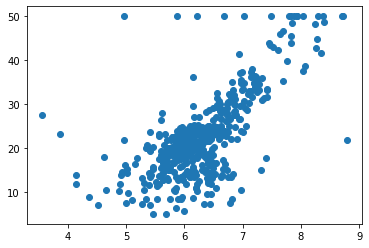

0.7361270597165677
[-7.81205578e-02  4.55042966e-02  4.61042092e-02  2.28002470e+00
 -1.64570038e+01  4.60545466e+00 -9.54823840e-03 -1.30970729e+00
  2.37699956e-01 -1.10126248e-02 -9.81632682e-01  9.76978241e-03
 -4.29342898e-01]
29.636693533353906


In [88]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

boston = datasets.load_boston()

X = boston.data
y = boston.target
print(X.shape,y.shape)
l_reg = linear_model.LinearRegression()

plt.scatter(X.T[5], y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = l_reg.score(X,y)
print(acc)
print(l_reg.coef_)
print(l_reg.intercept_)

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

In [11]:
bc = load_breast_cancer()

In [48]:
x = scale(bc.data)
y = bc.target
sample_size = 0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [45]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(x_train)
predictions = model.predict(x_test)
# predictions = np.where(predictions == 0, 2, predictions)
# predictions = np.where(predictions == 1, 0, predictions)
# predictions = np.where(predictions == 2, 1, predictions)

In [26]:
labels = model.labels_
# print('labels', labels)
print('predictions', predictions)
print(accuracy_score(y_test, predictions))
print(y_test)
print(pd.crosstab(y_train,labels))

predictions [1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 1]
0.11403508771929824
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1
 1 1 0]
col_0    0    1
row_0          
0      148   28
1       10  269


In [49]:
from sklearn import metrics
from time import time
print(labels.shape, model.labels_.shape)
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))


(455,) (455,)


In [51]:
bench_k_means(model, '1', x_train)

TypeError: slice indices must be integers or None or have an __index__ method

In [52]:
!pip install pillow mnist numpy sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=42d604c987586935a680aaea7073fba4aee4020ccdc0344efdaf94b9d4838168
  Stored in directory: /home/shae/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [56]:
from PIL import Image
import mnist
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [76]:
x_train = mnist.train_images()
y_train = mnist.train_labels()
x_test = mnist.test_images()
y_test = mnist.test_labels()
x_train = x_train.reshape((-1,28*28))
x_test = x_test.reshape((-1,28*28))
x_test.shape

(10000, 784)

In [77]:
x_train = np.array(x_train/256)
x_test = np.array(x_test/256)

In [72]:
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(64,64))

In [73]:
clf.fit(x_train,y_train)

/home/shae/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 64))

In [81]:
predictions = clf.predict(x_test)
acc = confusion_matrix(y_test, predictions)
print(acc)
def accuracy(cm):
    diagonal = cm.trace()
    elements = cm.sum()
    return diagonal/elements

[[ 936    0   23    6    1    0    0    1    7    6]
 [   0 1087    7   22    1    0    3   13    2    0]
 [   1    1  981   40    1    0    0    4    4    0]
 [   0    0    6  981    0   14    0    5    3    1]
 [   2    1   46   35  767    1    1   20   14   95]
 [   5    0    8   27    4  815    6    0   22    5]
 [  11    2   91    7    2   37  790    0   13    5]
 [   0    2   36   53    4    0    0  904    1   28]
 [   1    5   39  140    0   17    4   12  753    3]
 [   1    1    7   54    4    8    0   52    5  877]]


In [82]:
accuracy(acc)

0.8891